# Ecuador


In [1]:
import sys
import warnings
import pandas as pd

sys.path.append('../../')

from utils.data_anual import annual_data
from utils.clean_imports import wrangling
from utils.top_imports import top_importadores
from general_utils.export_api import export_API
from utils.vol_origenes import analisis_origenes
from utils.clean_historical import wrangling_historical_data

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

warnings.simplefilter("ignore")

                    ### ~~~ ###
                ###     PATH     ###
                    ### ~~~ ###

location_2013 = "./data/283525_Importaciones_2013.xlsx"
location_2014 = "./data/283525_Importaciones_2014.xlsx"
location_2015 = "./data/283525_Importaciones_2015.xlsx"
location_2016 = "./data/283525_Importaciones_2016.xlsx"
location_2017 = "./data/283525_Importaciones_2017.xlsx"
location_2018 = "./data/283525_Importaciones_2018.xlsx"
location_2019 = "./data/283525_Importaciones_2019.xlsx"
location_2020 = "./data/283525_Importaciones_2020.xlsx"
location_2021 = "./data/283525_Importaciones_2021.xlsx"
location_2022 = "./data/283525_Importaciones_2022.xlsx"
location_2023 = "./data/283525_Importaciones_2023.xlsx"

                    ### ~~~ ###
                ###     DATA     ###
                    ### ~~~ ###

data2013 = pd.read_excel(location_2013, engine="openpyxl")
data2014 = pd.read_excel(location_2014, engine="openpyxl")
data2015 = pd.read_excel(location_2015, engine="openpyxl")
data2016 = pd.read_excel(location_2016, engine="openpyxl")
data2017 = pd.read_excel(location_2017, engine="openpyxl")
data2018 = pd.read_excel(location_2018, engine="openpyxl")
data2019 = pd.read_excel(location_2019, engine="openpyxl")
data2020 = pd.read_excel(location_2020, engine="openpyxl")
data2021 = pd.read_excel(location_2021, engine="openpyxl")
data2022 = pd.read_excel(location_2022, engine="openpyxl")
data2023 = pd.read_excel(location_2023, engine="openpyxl")


In [2]:
# MERGE
dfs_historical = [data2013, data2014, data2015, data2016, data2017]
dfs = [data2018, data2019, data2020, data2021,
       data2022, data2023]  # data2022 funciona diferente

print("Este df tiene (filas, col):\n___________________")

for df in dfs_historical:
    print(f"> {df['Fecha'][0].year}: {df.shape}\n~~~~~~~~~~~~~~~~~~~")


Este df tiene (filas, col):
___________________
> 2013: (99, 48)
~~~~~~~~~~~~~~~~~~~
> 2014: (82, 48)
~~~~~~~~~~~~~~~~~~~
> 2015: (90, 48)
~~~~~~~~~~~~~~~~~~~
> 2016: (110, 48)
~~~~~~~~~~~~~~~~~~~
> 2017: (129, 48)
~~~~~~~~~~~~~~~~~~~


In [3]:
col = [col for col in data2016.columns]
col

# data2013.head(2)


['Ordinal',
 'Fecha',
 'NANDINA',
 'Kgs. Netos',
 'Kgs. Brutos',
 'País de Origen',
 'País de Procedencia',
 'Importador',
 'Proveedor',
 'Marca',
 'Refrendo',
 'Item',
 'Nro. DAU',
 'Regimen',
 'Aduana',
 'Puerto de Embarque',
 'FOB U$S',
 'FOB Unitario U$S',
 'Flete U$S',
 'Seguro U$S',
 'U$S CIF',
 'CIF Unitario',
 'Base Imponible U$S',
 'Advalorem',
 'Cantidad',
 'Unidad de Medida',
 'Bultos',
 'Via Transporte',
 'Nave',
 'Agencia Transporte',
 'Empresa Transportista',
 'Manifiesto',
 'Manifiesto Original',
 'Código Dcto. Transporte',
 'Documento de Transporte',
 'Descripción Comercial',
 'Descripcion Arancelaria',
 'Estado Mercaderia',
 'Tipo de Aforo',
 'Aforador',
 'Agente Afianzado',
 'Actividad Principal Importador',
 'Dirección - Importador',
 'Fecha Embarque',
 'Fecha Llegada',
 'Fecha Liquidación',
 'Fecha Pago',
 'Fecha Salida Almacén']

In [4]:
results_dfs = wrangling_historical_data(dfs_historical)
results_df = wrangling(dfs)

print('\n> ADDING NEW DATAFRAMES:\n')
for i in range(len(results_df)):
    results_dfs.append(results_df[i])
    print(f'~ Appended the year {results_df[i]["Fecha"].iloc[0].year} to the "results_df" DataFrame.')



> MUNGING HISTORICAL DATA:

~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2013
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2014
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2015
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2016
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2017
~~~~~~~~~~~~~~~~~~~

> MUNGING CURRENT DATA:

~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2018
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2019
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~

In [5]:
print("> Estadísticos del precio en el año per ton:\n___________________")

last_iterated_year = None

for df in results_dfs:
    if df is None or df.empty:
        print(
            f"<!!!> No data available for {last_iterated_year+1}\n~~~~~~~~~~~~~~~~~~~")
    else:
        year = df['Fecha'].iloc[0].year
        print(
            f"- En el {year}:\n{df['U$S Unitario'].describe()}\n~~~~~~~~~~~~~~~~~~~")
        last_iterated_year = year


> Estadísticos del precio en el año per ton:
___________________
- En el 2013:
count    40.000000
mean      0.526250
std       0.055916
min       0.440000
25%       0.480000
50%       0.515000
75%       0.550000
max       0.650000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2014:
count    43.000000
mean      0.526047
std       0.014823
min       0.490000
25%       0.520000
50%       0.520000
75%       0.530000
max       0.550000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2015:
count    64.000000
mean      0.525625
std       0.011391
min       0.510000
25%       0.520000
50%       0.520000
75%       0.540000
max       0.570000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2016:
count    68.000000
mean      0.527059
std       0.008987
min       0.510000
25%       0.520000
50%       0.520000
75%       0.532500
max       0.550000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2017:
count    110.000000
mean       0.4743

In [6]:
annual_data = annual_data(results_dfs)
export_API(annual_data)
annual_data


- 2013 appended.
- 2014 appended.
- 2015 appended.
- 2016 appended.
- 2017 appended.
- 2018 appended.
- 2019 appended.
- 2020 appended.
- 2020 appended.
- 2022 appended.
- 2023 appended.
~~~~~~~~~~~~~~~~~~~
> Transition dictionary:
- NCM: ['283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525']

- Año: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2020, 2022, 2023]

- Volumen Total: [6353.3, 9930.98, 10639.03, 11281.49, 14710.44, 17232.75, 12019.15, 10507.12, 10507.12, 18296.06, 1959.58]

__________________________ ~ EXPORT ~ __________________________

> Las hojas del excel actualmente son:

 [<Worksheet 'PERU' id:1182910367>]

- - - - - - - - - -

Spreadsheet doesn't exist: Creating the new worksheet...

- - - - - - - - - -

> Spreadsheet created.

_________________________________________________________________



,Año,NCM,Volumen Total
0,2013,283525,6353.30
1,2014,283525,9930.98
2,2015,283525,10639.03
3,2016,283525,11281.49
4,2017,283525,14710.44
5,2018,283525,17232.75
6,2019,283525,12019.15
7,2020,283525,10507.12
8,2020,283525,10507.12
9,2022,283525,18296.06


In [7]:
top_importadores = top_importadores(results_dfs)
export_API(top_importadores)
top_importadores


- Done with: PROQUIANDINOS S.A. (2013) 
- Done with: NUTRICION, SALES Y MINERALES NUTRISALMINSA S.A. (2013) 
- Done with: BRENNTAG ECUADOR S.A. (2013) 
- Done with: SUMINISTROS DE INSUMOS AVICOLAS PECUARIOS SIAP N.L (2013) 
- Done with: PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA (2013) 
- Done with: IMVAB COMPAÃIA LIMITADA (2013) 
- Done with: PROQUIMSA S.A. (2013) 
- Done with: PROQUIANDINOS SA (2013) 
- Done with: QUIMICA INDUSTRIAL MONTALVO AGUILAR QUIMASA S.A. (2013) 
- Done with: ADITIVOS Y ALIMENTOS S.A. ADILISA (2013) 
- Done with: IMVAB COMPAÂ¥IA LIMITADA (2013) 
- Done with: PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA (2014) 
- Done with: QUIMICA INDUSTRIAL MONTALVO AGUILAR QUIMASA S.A. (2014) 
- Done with: PROQUIMSA S.A. (2014) 
- Done with: ADITIVOS Y ALIMENTOS S.A. ADILISA (2014) 
- Done with: SUMINISTROS DE INSUMOS AVICOLAS PECUARIOS SIAP N.L (2014) 
- Done with: BRENNTAG ECUADOR S.A. (2014) 
- Done with: INTEROC S. A. (2014) 
- Done with: QUIMPAC ECUADOR S.A QUIMP

,Año,Importador,Participacion,Precio Promedio,Proveedores,Volumen Total (TN)
4,2013,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,59%,550.0,"QUIMPAC S.A, GFC ASIA LTD",3779.63
6,2013,PROQUIMSA S.A.,13%,570.0,"QUIMPAC S.A, QUIMPAC S.A.",844.62
8,2013,QUIMICA INDUSTRIAL MONTALVO AGUILAR QUIMASA S.A.,10%,510.0,"JEBSEN & JESSEN (GMBH & CO.)KG, MANUCHAR NV, NORBRIGHT INDUSTRY CO.,LTD.",613.00
0,2014,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,69%,520.0,"QUIMPAC SA, QUIMPAC S.A",6867.74
2,2014,PROQUIMSA S.A.,14%,550.0,"QUIMPAC S.A., QUIMPAC S.A",1391.13
7,2014,QUIMPAC ECUADOR S.A QUIMPACSA,12%,540.0,"QUIMPAC S.A, QUIMPAC S.A.",1205.12
0,2015,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,61%,520.0,"QUIMPAC SA, QUIMPAC S.A",6530.79
1,2015,QUIMPAC ECUADOR S.A QUIMPACSA,36%,540.0,"QUIMPAC S.A, QUIMPAC SA",3782.94
2,2015,ADITIVOS Y ALIMENTOS S.A. ADILISA,2%,530.0,"FARMASINO HOLDINGS (HK) LIMITED, TOYOND INDUSTRY LIMITED",205.30
0,2016,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,54%,520.0,"QUIMPAC S.A, QUIMPAC SA, QUIMPAC S.A.",6079.29


In [8]:
analisis_origenes = analisis_origenes(results_dfs)
export_API(analisis_origenes)
analisis_origenes


- Done with: China (2013) 
- Done with: Perú (2013) 
- Done with: Bélgica (2013) 
- Done with: Perú (2014) 
- Done with: China (2014) 
- Done with: Perú (2015) 
- Done with: China (2015) 
- Done with: Perú (2016) 
- Done with: China (2016) 
- Done with: Perú (2017) 
- Done with: China (2017) 
- Done with: Vietnam (2017) 
- Done with: ESPANA (2017) 
- Done with: Chile (2017) 
- Done with: Túnez (2017) 
- Done with: Turquía (2018) 
- Done with: Perú (2018) 
- Done with: Vietnam (2018) 
- Done with: China (2018) 
- Done with: Túnez (2018) 
- Done with: Países Bajos (2018) 
- Done with: Perú (2019) 
- Done with: Vietnam (2019) 
- Done with: China (2019) 
- Done with: Turquía (2019) 
- Done with: Hong Kong (2019) 
- Done with: China (2020) 
- Done with: Perú (2020) 
- Done with: Vietnam (2020) 
- Done with: China (2020) 
- Done with: Perú (2020) 
- Done with: Vietnam (2020) 
- Done with: Perú (2022) 
- Done with: China (2022) 
- Done with: Estados Unidos (2022) 
- Done with: Vietnam (2022) 

,NCM,Año,Pais,Volumen Total (TN),Participacion en Vol. Total,No. Importaciones
0,283525,2013,China,3164.06,50%,26
1,283525,2013,Perú,2963.19,47%,10
2,283525,2013,Bélgica,225.00,4%,3
0,283525,2014,Perú,9463.98,95%,34
1,283525,2014,China,467.00,5%,9
0,283525,2015,Perú,10313.73,97%,60
1,283525,2015,China,325.30,3%,4
0,283525,2016,Perú,11018.69,98%,65
1,283525,2016,China,262.80,2%,3
0,283525,2017,Perú,11241.14,76%,59


# Graphs


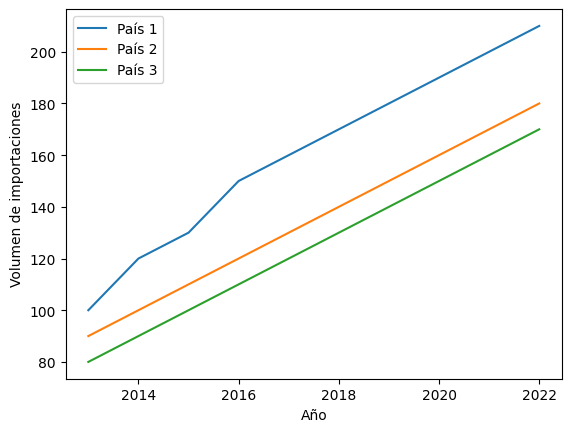

In [9]:
# GRAPHS (analisis_origenes)
import matplotlib.pyplot as plt

# Datos de ejemplo
volumenes = [[100, 120, 130, 150, 160, 170, 180, 190, 200, 210],
             [90, 100, 110, 120, 130, 140, 150, 160, 170, 180],
             [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]]

paises = ['País 1', 'País 2', 'País 3']

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar líneas para cada país
for i in range(len(volumenes)):
    ax.plot(range(2013, 2023), volumenes[i], label=paises[i])

# Configurar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de importaciones')

plt.show()


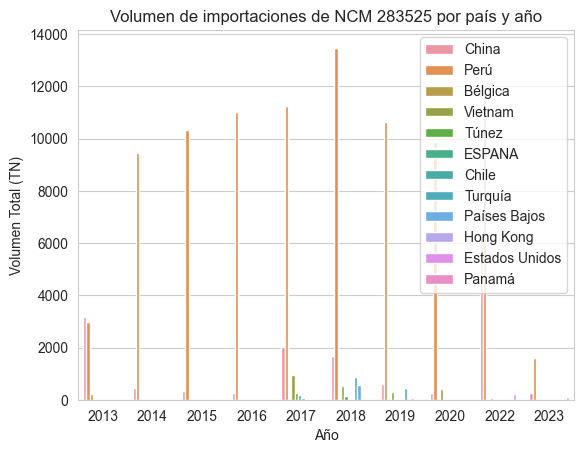

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# # Filtrar datos por NCM
# df_ncm = df[df['NCM']==283525]


# Gráfico de barras agrupado por país
sns.barplot(x='Año', y='Volumen Total (TN)',
            hue='Pais', data=analisis_origenes)

# Título del gráfico
plt.title('Volumen de importaciones de NCM 283525 por país y año')
plt.legend(loc='upper right')

# Mostrar gráfico
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


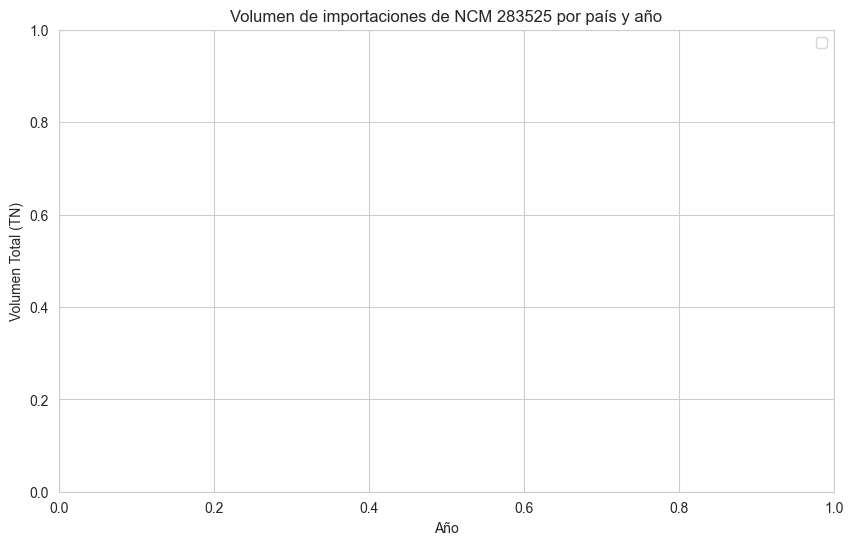

In [11]:
# Filtrar datos por NCM y agrupar por país
df_ncm_pais = analisis_origenes[analisis_origenes['NCM'] == 283525].groupby(
    'Pais')

# Gráfico de línea por país
fig, ax = plt.subplots(figsize=(10, 6))
for pais, data in df_ncm_pais:
    ax.plot(data['Año'], data['Volumen Total (TN)'], label=pais)

# Título del gráfico y etiquetas de los ejes
ax.set_title('Volumen de importaciones de NCM 283525 por país y año')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen Total (TN)')

# Leyenda del gráfico
ax.legend()

# Mostrar gráfico
plt.show()
